In [249]:
import numpy as np 
import pandas as pd 
import scipy.stats as st
import math
import matplotlib.pyplot as plt

In [250]:
import mysql.connector as sql
from sqlalchemy import create_engine
# create the engine to connect to mysql
mysql_con = sql.connect(host='', database='', user='', password='')
cursor = mysql_con.cursor()


In [251]:
df_ohoo = pd.read_sql('''
select item_id
,fc_id
,total_on_hand_units
,on_order_units
,total_on_hand_units + on_order_units
as inventory_position
from valhalla.temp_item_fc_import
where r2d2_division_name = 'HOME'
and r2d2_super_department_name = 'HOME DECOR'
;
'''
, con=mysql_con)

In [252]:
df_ohoo

,item_id,fc_id,total_on_hand_units,on_order_units,inventory_position
0,12173433,4364,3257,0,3257
1,12173435,4364,2613,0,2613
2,12173436,4364,2514,0,2514
3,12173437,4364,260,0,260
4,20606852,4364,393,0,393
...,...,...,...,...,...
4414,987201517,8556,41,0,41
4415,988163874,8556,0,0,0
4416,991754621,8556,0,0,0
4417,996050919,8556,0,0,0


In [253]:
df_sales = df_ohoo.loc[:,['item_id','fc_id','inventory_position']]
df_sales.loc[:,'key']=1
df_sales

,item_id,fc_id,inventory_position,key
0,12173433,4364,3257,1
1,12173435,4364,2613,1
2,12173436,4364,2514,1
3,12173437,4364,260,1
4,20606852,4364,393,1
...,...,...,...,...
4414,987201517,8556,41,1
4415,988163874,8556,0,1
4416,991754621,8556,0,1
4417,996050919,8556,0,1


In [254]:
import datetime
def saturday_before(d):
    days_before = d.weekday() -5
    if days_before < 0: # Target day already happened this week
        days_before+= 7
    return (d - datetime.timedelta(days_before))
# .strftime('%Y-%m-%d')

d = datetime.date.today()
saturday_before(d)

datetime.date(2020, 3, 7)

In [255]:
first_date = saturday_before(datetime.date.today())

In [256]:
first_date

datetime.date(2020, 3, 7)

In [257]:
week_start_date = [(first_date+datetime.timedelta(7*i)).strftime('%Y-%m-%d') for i in range(0,52)]

In [258]:
week_start_date

['2020-03-07',
 '2020-03-14',
 '2020-03-21',
 '2020-03-28',
 '2020-04-04',
 '2020-04-11',
 '2020-04-18',
 '2020-04-25',
 '2020-05-02',
 '2020-05-09',
 '2020-05-16',
 '2020-05-23',
 '2020-05-30',
 '2020-06-06',
 '2020-06-13',
 '2020-06-20',
 '2020-06-27',
 '2020-07-04',
 '2020-07-11',
 '2020-07-18',
 '2020-07-25',
 '2020-08-01',
 '2020-08-08',
 '2020-08-15',
 '2020-08-22',
 '2020-08-29',
 '2020-09-05',
 '2020-09-12',
 '2020-09-19',
 '2020-09-26',
 '2020-10-03',
 '2020-10-10',
 '2020-10-17',
 '2020-10-24',
 '2020-10-31',
 '2020-11-07',
 '2020-11-14',
 '2020-11-21',
 '2020-11-28',
 '2020-12-05',
 '2020-12-12',
 '2020-12-19',
 '2020-12-26',
 '2021-01-02',
 '2021-01-09',
 '2021-01-16',
 '2021-01-23',
 '2021-01-30',
 '2021-02-06',
 '2021-02-13',
 '2021-02-20',
 '2021-02-27']

In [259]:
week_start_date = pd.DataFrame(week_start_date,columns=['weeks_start_date']) 
week_start_date['key'] =1
week_start_date


,weeks_start_date,key
0,2020-03-07,1
1,2020-03-14,1
2,2020-03-21,1
3,2020-03-28,1
4,2020-04-04,1
5,2020-04-11,1
6,2020-04-18,1
7,2020-04-25,1
8,2020-05-02,1
9,2020-05-09,1


In [260]:
df_sales = pd.merge(df_sales,week_start_date,how='outer',on='key')
df_sales = df_sales.drop(columns = ['key'])

In [261]:
df_sales['sales'] = df_sales['inventory_position'] * 0.2

In [262]:
df_sales = df_sales.drop(columns = ['inventory_position'])

In [263]:
df_sales.columns

Index(['item_id', 'fc_id', 'weeks_start_date', 'sales'], dtype='object')

In [264]:
df_sales

,item_id,fc_id,weeks_start_date,sales
0,12173433,4364,2020-03-07,651.4
1,12173433,4364,2020-03-14,651.4
2,12173433,4364,2020-03-21,651.4
3,12173433,4364,2020-03-28,651.4
4,12173433,4364,2020-04-04,651.4
...,...,...,...,...
229783,997475248,8556,2021-01-30,128.0
229784,997475248,8556,2021-02-06,128.0
229785,997475248,8556,2021-02-13,128.0
229786,997475248,8556,2021-02-20,128.0


In [265]:
# should use sum here instead of mean
df_sales = df_sales[['item_id','weeks_start_date','sales']].groupby(['item_id', 'weeks_start_date'], as_index=False).sum()

In [266]:
df_sales = df_sales.pivot(index='item_id', columns='weeks_start_date', values='sales')

In [267]:
df_sales

weeks_start_date,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,2020-04-25,2020-05-02,2020-05-09,...,2020-12-26,2021-01-02,2021-01-09,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27
item_id,,,,,,,,,,,,,,,,,,,,,
12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
12173435,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,...,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6
12173436,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,...,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4
12173437,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,...,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2
16783738,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,...,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995666146,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,...,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6
995730402,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,...,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6
996050919,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0


In [268]:
df_sales.to_csv('sales_scenario_1.csv')

In [269]:
df_sales

weeks_start_date,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,2020-04-25,2020-05-02,2020-05-09,...,2020-12-26,2021-01-02,2021-01-09,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27
item_id,,,,,,,,,,,,,,,,,,,,,
12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
12173435,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,...,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6
12173436,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,...,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4,1883.4
12173437,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,...,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2,98.2
16783738,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,...,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995666146,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,...,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6,263.6
995730402,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,...,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6
996050919,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0


In [270]:
df_alloc=pd.read_sql('''
select * from valhalla.import_fc_allocation
order by item_id,fc_id
;
'''
, con=mysql_con)

In [271]:
df_alloc

,item_id,fc_id,fc_name,allocation_percentage
0,872236,4364,LAX,0.00
1,872236,4401,ATL,1.00
2,872236,4900,DFW,0.00
3,872236,6284,MCO,0.00
4,872236,6559,IND,0.00
...,...,...,...,...
108432,999960840,4401,ATL,0.28
108433,999960840,4900,DFW,0.17
108434,999960840,6284,MCO,0.08
108435,999960840,6559,IND,0.24


In [272]:
df_sales = df_sales.merge(df_alloc,on=['item_id'],how='left')
df_sales

,item_id,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,2020-04-25,2020-05-02,...,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27,fc_id,fc_name,allocation_percentage
0,12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,4364,LAX,0.11
1,12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,4401,ATL,0.13
2,12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,4900,DFW,0.09
3,12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,6284,MCO,0.06
4,12173433,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,6559,IND,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,998557331,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,4401,ATL,0.14
4415,998557331,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,4900,DFW,0.14
4416,998557331,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,6284,MCO,0.03
4417,998557331,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,6559,IND,0.28


In [273]:
df_sales.columns

Index(['item_id', '2020-03-07', '2020-03-14', '2020-03-21', '2020-03-28',
       '2020-04-04', '2020-04-11', '2020-04-18', '2020-04-25', '2020-05-02',
       '2020-05-09', '2020-05-16', '2020-05-23', '2020-05-30', '2020-06-06',
       '2020-06-13', '2020-06-20', '2020-06-27', '2020-07-04', '2020-07-11',
       '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08', '2020-08-15',
       '2020-08-22', '2020-08-29', '2020-09-05', '2020-09-12', '2020-09-19',
       '2020-09-26', '2020-10-03', '2020-10-10', '2020-10-17', '2020-10-24',
       '2020-10-31', '2020-11-07', '2020-11-14', '2020-11-21', '2020-11-28',
       '2020-12-05', '2020-12-12', '2020-12-19', '2020-12-26', '2021-01-02',
       '2021-01-09', '2021-01-16', '2021-01-23', '2021-01-30', '2021-02-06',
       '2021-02-13', '2021-02-20', '2021-02-27', 'fc_id', 'fc_name',
       'allocation_percentage'],
      dtype='object')

In [274]:
columns = ['item_id','fc_id','allocation_percentage', '2020-03-07', '2020-03-14', '2020-03-21', '2020-03-28',
       '2020-04-04', '2020-04-11', '2020-04-18', '2020-04-25', '2020-05-02',
       '2020-05-09', '2020-05-16', '2020-05-23', '2020-05-30', '2020-06-06',
       '2020-06-13', '2020-06-20', '2020-06-27', '2020-07-04', '2020-07-11',
       '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08', '2020-08-15',
       '2020-08-22', '2020-08-29', '2020-09-05', '2020-09-12', '2020-09-19',
       '2020-09-26', '2020-10-03', '2020-10-10', '2020-10-17', '2020-10-24',
       '2020-10-31', '2020-11-07', '2020-11-14', '2020-11-21', '2020-11-28',
       '2020-12-05', '2020-12-12', '2020-12-19', '2020-12-26', '2021-01-02',
       '2021-01-09', '2021-01-16', '2021-01-23', '2021-01-30', '2021-02-06',
       '2021-02-13', '2021-02-20', '2021-02-27']

In [275]:
df_sales = df_sales[columns]
df_sales

,item_id,fc_id,allocation_percentage,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,...,2020-12-26,2021-01-02,2021-01-09,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27
0,12173433,4364,0.11,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
1,12173433,4401,0.13,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
2,12173433,4900,0.09,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
3,12173433,6284,0.06,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
4,12173433,6559,0.25,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,...,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6,1125.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,998557331,4401,0.14,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4415,998557331,4900,0.14,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4416,998557331,6284,0.03,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4417,998557331,6559,0.28,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2


In [276]:
df_sales.iloc[:,3:]=df_sales.iloc[:,3:].multiply(df_sales.allocation_percentage,axis='index')

In [277]:
df_sales

,item_id,fc_id,allocation_percentage,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,...,2020-12-26,2021-01-02,2021-01-09,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27
0,12173433,4364,0.11,123.816,123.816,123.816,123.816,123.816,123.816,123.816,...,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816
1,12173433,4401,0.13,146.328,146.328,146.328,146.328,146.328,146.328,146.328,...,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328
2,12173433,4900,0.09,101.304,101.304,101.304,101.304,101.304,101.304,101.304,...,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304
3,12173433,6284,0.06,67.536,67.536,67.536,67.536,67.536,67.536,67.536,...,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536
4,12173433,6559,0.25,281.400,281.400,281.400,281.400,281.400,281.400,281.400,...,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,998557331,4401,0.14,0.028,0.028,0.028,0.028,0.028,0.028,0.028,...,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028
4415,998557331,4900,0.14,0.028,0.028,0.028,0.028,0.028,0.028,0.028,...,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028
4416,998557331,6284,0.03,0.006,0.006,0.006,0.006,0.006,0.006,0.006,...,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006
4417,998557331,6559,0.28,0.056,0.056,0.056,0.056,0.056,0.056,0.056,...,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056


In [279]:
# scenario
scenario= 1
if scenario == 1: 
    df_forecast = df_sales
df_forecast

,item_id,fc_id,allocation_percentage,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,...,2020-12-26,2021-01-02,2021-01-09,2021-01-16,2021-01-23,2021-01-30,2021-02-06,2021-02-13,2021-02-20,2021-02-27
0,12173433,4364,0.11,123.816,123.816,123.816,123.816,123.816,123.816,123.816,...,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816,123.816
1,12173433,4401,0.13,146.328,146.328,146.328,146.328,146.328,146.328,146.328,...,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328,146.328
2,12173433,4900,0.09,101.304,101.304,101.304,101.304,101.304,101.304,101.304,...,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304,101.304
3,12173433,6284,0.06,67.536,67.536,67.536,67.536,67.536,67.536,67.536,...,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536,67.536
4,12173433,6559,0.25,281.400,281.400,281.400,281.400,281.400,281.400,281.400,...,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400,281.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,998557331,4401,0.14,0.028,0.028,0.028,0.028,0.028,0.028,0.028,...,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028
4415,998557331,4900,0.14,0.028,0.028,0.028,0.028,0.028,0.028,0.028,...,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028
4416,998557331,6284,0.03,0.006,0.006,0.006,0.006,0.006,0.006,0.006,...,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006
4417,998557331,6559,0.28,0.056,0.056,0.056,0.056,0.056,0.056,0.056,...,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056


In [504]:
def simulation(item_id,fc_id,mean_lead_time,std_lead_time,review_time
              ,desired_service_level,initial_inventory,initial_on_order,simulation_period):
    # inventory_level is EOD
    inventory_level = []
    order_receive = {}
    # assume initial on order will be received in half lead time
    if initial_on_order > 0:
        order_receive[round(np.random.normal(mean_lead_time/2, std_lead_time, 1)[0])] = initial_on_order
    order_generate = {}
    on_order = initial_on_order
    # inventory_position is EOD
    inventory_position = []
    sales = []
    outl_list = []
    week = []
    for i in range(0, simulation_period):
        week.append(i)
        cycle_stock = cycle_time_mean_func(item_id,fc_id,i,mean_lead_time,review_time)
        safety_stock = st.norm.ppf(desired_service_level) * math.sqrt(0) # change safety stock formula acoordingly
        outl = cycle_stock + safety_stock
        outl_list.append(outl)
    #     initialize inventory level and position
        if i == 0:
            inventory_level.append(initial_inventory)
            inventory_position.append(initial_inventory + on_order)
        current_inventory_level = inventory_level[-1]
    #     assume orders get received BOD
        if i in order_receive:
            current_inventory_level += order_receive[i]
            on_order -= order_receive[i]
            
        date = (first_date+datetime.timedelta(7*i)).strftime('%Y-%m-%d')
        temp=df_sales[(df_sales['item_id']==item_id) 
                 & (df_sales['fc_id']==fc_id) 
                 ][date]
        random_demand = temp.iloc[0]
        weekly_sales = min(random_demand, current_inventory_level)
        sales.append(weekly_sales)
        inventory_level.append(current_inventory_level - weekly_sales)
        current_inventory_level -= weekly_sales
    #     generate order
    
        if round(outl - inventory_position[-1]) > 0 and (i % review_time == 0):
            random_lead_time = round(np.random.normal(mean_lead_time, std_lead_time, 1)[0])
            order_receive[i +
                          random_lead_time] = round(outl - current_inventory_level - on_order)
            on_order += round(outl - current_inventory_level - on_order) 
            order_generate[i] = round(outl - inventory_position[-1])
        inventory_position.append(current_inventory_level + on_order)
    # drop initial values
    inventory_level = inventory_level[1:]
    inventory_position = inventory_position[1:]
#     prepare for output
    order_generate = pd.DataFrame.from_dict(order_generate, orient='index',columns = ['order_qty'])
    order_generate = order_generate.fillna(0)
    order_receive = pd.DataFrame.from_dict(order_receive, orient='index',columns = ['receive_qty'])
    order_receive = order_receive.fillna(0)
    df = pd.DataFrame(list(zip(week,inventory_level, inventory_position,outl_list)), 
               columns =['week','inventory_level', 'inventory_position','outl']) 
    df = df.merge(order_generate,left_index=True, right_index=True,how='left')
    df = df.merge(order_receive,left_index=True, right_index=True,how='left')
    # set missing values to 0 
    df['item_id']=item_id
    df['fc_id']=fc_id
    df=df[['item_id','fc_id','week','inventory_level','inventory_position','outl','order_qty','receive_qty']]
    if(df['order_qty'].isnull().sum() == simulation_period):
        df['order_qty']=0
    else:
        df.loc[np.isnan(df['order_qty']) ==1, 'order_qty'] =  0

    if(df['receive_qty'].isnull().sum() == simulation_period):
        df['receive_qty']=0
    else:
        df.loc[np.isnan(df['receive_qty']) ==1, 'receive_qty'] =  0
#     df.loc[np.isnan(df['order_qty']) ==1, 'order_qty'] =  0
#     df.loc[np.isnan(df['receive_qty']) ==1, 'receive_qty'] =  0
    return df 

In [505]:
# generate a forecast date list everytime we need to order
def cycle_time_date_list(date,mean_lead_time,review_time):
    return [(date+datetime.timedelta(7*i)).strftime('%Y-%m-%d') for i in range(0,mean_lead_time+review_time)]

In [506]:
# generate the mean of cycle time forecast
def cycle_time_mean_func(item_id,fc_id,i,mean_lead_time,review_time):
    mean_list=[]
    std_list=[]
    temp=df_forecast[(df_forecast['item_id']==item_id) 
                & (df_forecast['fc_id'] == fc_id)
               ]
    date = (first_date+datetime.timedelta(7*i))
    cols=cycle_time_date_list(date,mean_lead_time,review_time)
    temp = temp[cols]
    return(np.sum(temp,axis=1).iloc[0]) #row sum

i=1
item_id = 12173435
fc_id = 4364
cycle_time_mean_func(item_id,fc_id,i,mean_lead_time=14,review_time=4)

1615.68

In [507]:
first_date = saturday_before(datetime.date.today())
first_date

datetime.date(2020, 3, 7)

In [513]:
# all units in weeks
mean_lead_time = 14
std_lead_time = 0
review_time = 4
# mean_weekly_demand = 20
# std_weekly_demand = 0.3 * mean_weekly_demand
alpha = 0.1
desired_service_level = 1 - alpha

item_fc_set = set()
item_fc_count = 0
df_result = pd.DataFrame()
for index, row in df_ohoo.iterrows():
    item_id=row['item_id']
    fc_id=row['fc_id']  
    if (item_id,fc_id) not in item_fc_set:
        initial_inventory = row['total_on_hand_units']
        initial_on_order = row['on_order_units']
        simulation_period = 30
        # call the simulation function
        df_result = df_result.append(simulation(item_id,fc_id,mean_lead_time,std_lead_time,review_time
              ,desired_service_level,initial_inventory,initial_on_order,simulation_period))
    else:
        print("Error! This item_fc has duplicates")
    item_fc_set.add((item_id,fc_id))
    item_fc_count += 1 
    print('Algo has run {} item_fcs'.format(item_fc_count),end="\r")
#     if item_fc_count == 20:
#         break
print('\nAlgo Finished!')

Algo has run 4419 item_fcs
Algo Finished!


In [514]:
df_result 

,item_id,fc_id,week,inventory_level,inventory_position,outl,order_qty,receive_qty
0,12173433,4364,0,3133.184,3133.184,2228.688,0.0,0.0
1,12173433,4364,1,3009.368,3009.368,2228.688,0.0,0.0
2,12173433,4364,2,2885.552,2885.552,2228.688,0.0,0.0
3,12173433,4364,3,2761.736,2761.736,2228.688,0.0,0.0
4,12173433,4364,4,2637.920,2637.920,2228.688,0.0,0.0
...,...,...,...,...,...,...,...,...
25,997475248,8556,25,41.760,717.760,760.320,0.0,0.0
26,997475248,8556,26,168.520,675.520,760.320,0.0,169.0
27,997475248,8556,27,126.280,633.280,760.320,0.0,0.0
28,997475248,8556,28,84.040,760.040,760.320,127.0,0.0


In [515]:
df_result.iloc[30:60,:]

,item_id,fc_id,week,inventory_level,inventory_position,outl,order_qty,receive_qty
0,12173435,4364,0,2523.24,2523.24,1615.68,0.0,0.0
1,12173435,4364,1,2433.48,2433.48,1615.68,0.0,0.0
2,12173435,4364,2,2343.72,2343.72,1615.68,0.0,0.0
3,12173435,4364,3,2253.96,2253.96,1615.68,0.0,0.0
4,12173435,4364,4,2164.20,2164.20,1615.68,0.0,0.0
5,12173435,4364,5,2074.44,2074.44,1615.68,0.0,0.0
6,12173435,4364,6,1984.68,1984.68,1615.68,0.0,0.0
7,12173435,4364,7,1894.92,1894.92,1615.68,0.0,0.0
8,12173435,4364,8,1805.16,1805.16,1615.68,0.0,0.0
9,12173435,4364,9,1715.40,1715.40,1615.68,0.0,0.0


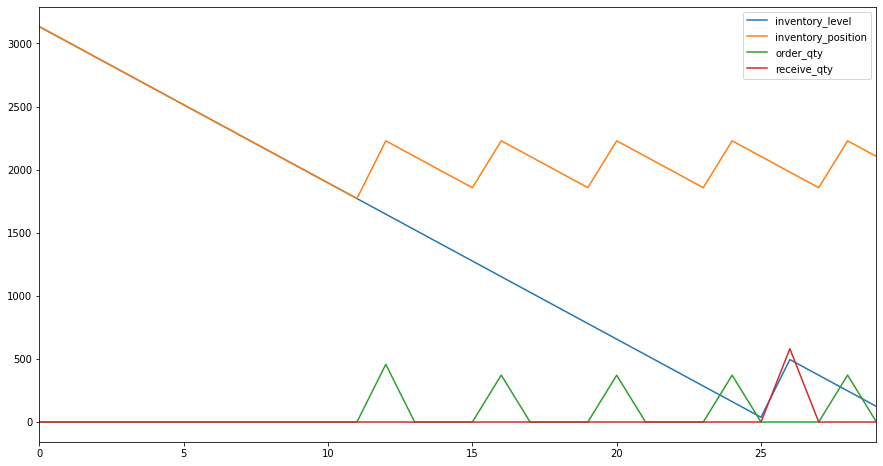

In [516]:
df_result[0:30][['inventory_level','inventory_position','order_qty','receive_qty']].plot(figsize=(15,8))

In [481]:
# mean_daily_demand*(review_time/2) + safety_stock

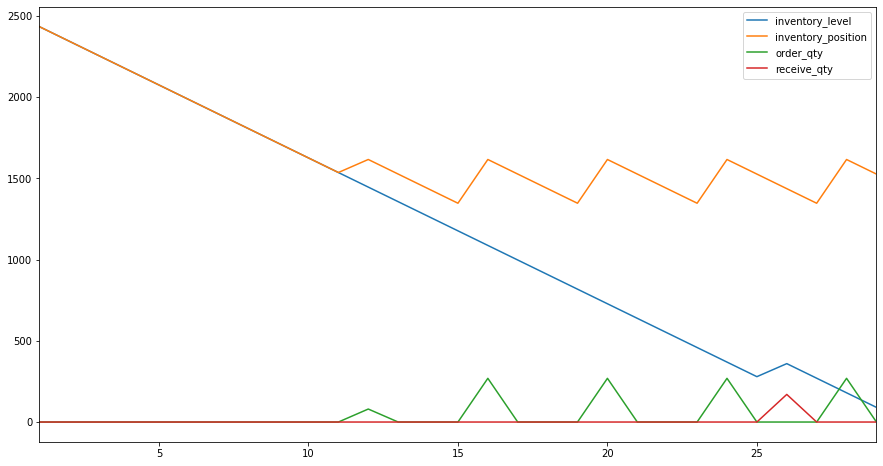

In [518]:
df_result.iloc[31:60,:][['inventory_level','inventory_position','order_qty','receive_qty']][:].plot(figsize=(15,8))

In [ ]:
df_result.groupby